# Práctica 3 (notebook)

En este notebook se aplican los siguientes conceptos:
- Medidas de grupos de nodos
  - Coeficiente de agrupamiento (clustering): https://youtu.be/zH5oMNKtVoA
  - Detección de comunidades: https://www.youtube.com/watch?v=pG5XKZqyFmk&t
- Propiedades globales: https://youtu.be/FBu3yA0CdwY
  - Componentes y máxima componente
  - Medidas promedio
  - Modularidad: https://www.youtube.com/watch?v=jlAZJqAqlTA&t
  - Distribución de grado: https://youtu.be/nUi203c53lA


La única función nueva que se importar para esta práctica es greedy_modularity_communities, se se encuentra en networkx.algorithms.community y es para la detección de comunidades según el algoritmo de Newman, Clauset y Moore (ver [documentación](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.modularity_max.greedy_modularity_communities.html#networkx.algorithms.community.modularity_max.greedy_modularity_communities))

In [ ]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files #solo para trabajar en Colaboratory

from networkx.algorithms.community import greedy_modularity_communities # para detección de comunidades

## Medidas de grupos de nodos

Para este notebook se utilizarán datos de redes reales. La importación de datos reales en un notebook se discute en la [práctica 2](https://www.youtube.com/playlist?list=PLCTzelSlkHdP2NZ-zKVwPqSbnw61b9eY7).


In [ ]:
files.upload()

Saving ca-netscience.mtx to ca-netscience.mtx


{'ca-netscience.mtx': b'%MatrixMarket matrix coordinate pattern symmetric \n% 379 379 914\n2 1\n3 1\n4 1\n5 1\n16 1\n44 1\n113 1\n131 1\n250 1\n259 1\n3 2\n5 4\n13 4\n14 4\n15 4\n16 4\n44 4\n45 4\n46 4\n47 4\n61 4\n126 4\n127 4\n128 4\n146 4\n152 4\n153 4\n154 4\n164 4\n165 4\n166 4\n176 4\n177 4\n249 4\n250 4\n274 4\n313 4\n314 4\n323 4\n324 4\n330 4\n371 4\n373 4\n374 4\n15 5\n16 5\n44 5\n45 5\n46 5\n47 5\n176 5\n177 5\n199 5\n201 5\n202 5\n204 5\n231 5\n235 5\n236 5\n237 5\n238 5\n249 5\n250 5\n254 5\n298 5\n313 5\n314 5\n373 5\n374 5\n7 6\n8 6\n8 7\n190 7\n191 7\n192 7\n193 7\n26 8\n62 8\n63 8\n64 8\n65 8\n137 8\n189 8\n342 8\n343 8\n344 8\n10 9\n11 9\n12 9\n11 10\n12 10\n67 10\n68 10\n69 10\n12 11\n14 13\n15 13\n16 13\n17 13\n18 13\n19 13\n20 13\n274 13\n15 14\n16 14\n16 15\n45 15\n46 15\n47 15\n176 15\n177 15\n278 15\n279 15\n334 15\n366 15\n367 15\n368 15\n45 16\n46 16\n47 16\n153 16\n154 16\n176 16\n177 16\n249 16\n250 16\n313 16\n314 16\n323 16\n324 16\n371 16\n373 16\n18 17\n

Aquí se utiliza una red de coautoría en trabajos de redes obtenida de www.networkrepository.com

In [ ]:
ruta = 'ca-netscience.mtx'

datos = pd.read_csv(ruta,
            #nrows = 10,
            skiprows = 2,
            header = None,
            sep = ' ')
datos.columns = ['Nodo1', 'Nodo2']

G = nx.from_pandas_edgelist(datos, source = 'Nodo1', target = 'Nodo2')

### Clustering (coeficiente de agrupamiento o acumulación)

En forma completamente análoga a las centralidades analizadas en la práctica 2, la función ```nx.clustering(G)``` arroja un diccionario que asigna a cada nodo un valor de agrupamiento (acumulación). Siguiendo el mismo procedimiento para visualizarlo, a continuación se convierte el diccionario en un arreglo y se introduce como argumento para la función ```nx.draw()```. Para esta red, el layout "Kamada kawai" ofrece una visualización adecuada; ustedes pueden explorar distintos diseños (ver [documentación](https://networkx.org/documentation/stable/reference/drawing.html) correspondiente)

In [ ]:
diccionario = nx.clustering(G)
clus = np.array([ diccionario[i] for i in G ])

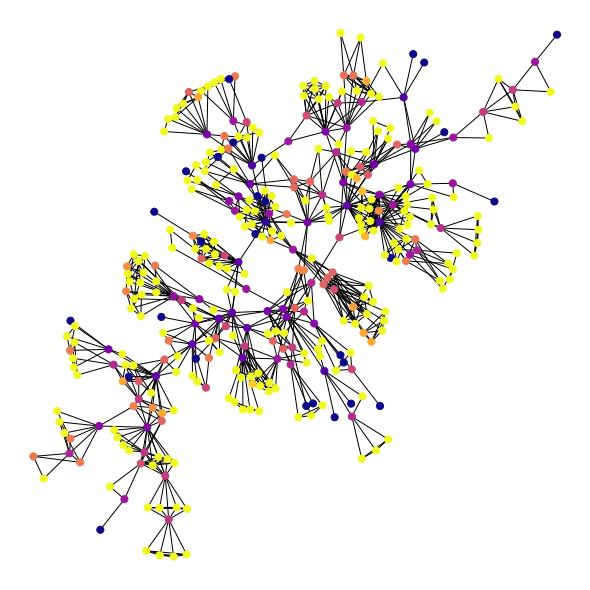

In [ ]:
plt.figure(figsize = [8,8])
nx.draw_kamada_kawai(G,
                     node_color = clus,
                     node_size = 50,
                     cmap = 'plasma')

Como se dice en la parte práctica, el coeficiente de clustering es una medida de cuánto se acumulan enlaces en grupos de nodos, o lo que es lo mismo, cuántos enlaces hay entre los nodos vecinos de un nodo. En esta imagen se utiliza el mapeo de color (```cmap```) plasma, que recorre del azul para valores pequeños al amarillo para valores grandes. A partir de ello se pueden identificar zonas de "alta densidad" de enlaces en amarillo y nodos azules, más bien aislados (relativamente).

Se recomienda explorar los distintos cmap disponibles para matplotlib: https://matplotlib.org/stable/tutorials/colors/colormaps.html

### Comunidades

Como se explicó en el video correspondiente, algunos algoritmos de detección de comunidades utilizan el método de maximización de la modularidad. El empleado a continuación se basa en el método de Newman, Clauset y Moore proporcionado en la parte teórica. El método desarrollado por Blondel que se explicó con más detalle también está implementado en networkx y se les recomienda explorarlo e implementarlo. En su [documentación](https://python-louvain.readthedocs.io/en/latest/) viene un ejemplo que pueden copiar y pegar, introduciendo su red de trabajo.

Su implementación es inmediata, como se importó directamente, únicamente hay que aplicar la función a la red. Lo que arroja es una lista de objetos ```frozenset``` que agrupan a los nodos y cuya naturaleza no nos importa mucho aquí.

In [ ]:
comunidades = greedy_modularity_communities(G)

In [ ]:
comunidades

[frozenset({21,
            22,
            23,
            24,
            30,
            31,
            32,
            33,
            34,
            35,
            36,
            41,
            42,
            43,
            50,
            51,
            52,
            53,
            54,
            55,
            76,
            109,
            167,
            168,
            169,
            170,
            205,
            216,
            217,
            218,
            219,
            220,
            221,
            227,
            228,
            232,
            233,
            241,
            242,
            243,
            244,
            266,
            267,
            268,
            275,
            276,
            277,
            287,
            288,
            289,
            290,
            291,
            292,
            307,
            336,
            364,
            369,
            370}),
 frozenset({25,
            26,
 

Imitando los procedimientos anteriores en los que partimos de un diccionario y lo convertimos en arreglos, a continuación generamos un diccionario al que a cada nodo le asignará un valor numérico en función de a qué comunidad pertenece. Los pasos son los siguientes:
- Se genera un diccionario vacío
- Se hace un ```for``` sobre el objeto ```enumerate(comunidades)```; este objeto le asocia a cada elemento del iterable ```comunidades``` un índice, por eso en el ```for``` hay que introducir dos objetos.
- Como cada elemento de ```comunidades``` es una "lista" de nodos, hacemos un ```for``` que los recorra y a cada uno se le asocia el índice que ```enumerate``` le asoció a su grupo.
- Ya con ese diccionario, se puede generar el arreglo como se ha hecho hasta ahora.

In [ ]:
diccionario = {}

for i, comunidad in enumerate(comunidades): #visita cada comunidad
  for nodo in comunidad: #visita cada nodo de la comunidad
    diccionario[nodo] = i 
    
diccionario

{1: 2,
 2: 2,
 3: 2,
 4: 2,
 5: 2,
 6: 6,
 7: 6,
 8: 6,
 9: 3,
 10: 3,
 11: 3,
 12: 3,
 13: 2,
 14: 2,
 15: 2,
 16: 2,
 17: 5,
 18: 5,
 19: 2,
 20: 2,
 21: 0,
 22: 0,
 23: 0,
 24: 0,
 25: 1,
 26: 1,
 27: 1,
 28: 1,
 29: 5,
 30: 0,
 31: 0,
 32: 0,
 33: 0,
 34: 0,
 35: 0,
 36: 0,
 37: 5,
 38: 5,
 39: 1,
 40: 1,
 41: 0,
 42: 0,
 43: 0,
 44: 2,
 45: 2,
 46: 2,
 47: 2,
 48: 13,
 49: 13,
 50: 0,
 51: 0,
 52: 0,
 53: 0,
 54: 0,
 55: 0,
 56: 7,
 57: 7,
 58: 5,
 59: 5,
 60: 5,
 61: 2,
 62: 6,
 63: 6,
 64: 6,
 65: 6,
 66: 7,
 67: 3,
 68: 3,
 69: 3,
 70: 3,
 71: 3,
 72: 3,
 73: 3,
 74: 13,
 75: 3,
 76: 0,
 77: 17,
 78: 17,
 79: 17,
 80: 3,
 81: 3,
 82: 9,
 83: 9,
 84: 9,
 85: 9,
 86: 9,
 87: 9,
 88: 9,
 89: 9,
 90: 4,
 91: 4,
 92: 4,
 93: 8,
 94: 8,
 95: 8,
 96: 8,
 97: 8,
 98: 8,
 99: 8,
 100: 7,
 101: 7,
 102: 7,
 103: 7,
 104: 1,
 105: 1,
 106: 1,
 107: 1,
 108: 1,
 109: 0,
 110: 7,
 111: 7,
 112: 4,
 113: 4,
 114: 4,
 115: 4,
 116: 14,
 117: 14,
 118: 3,
 119: 3,
 120: 3,
 121: 3,
 122: 3,
 1

In [ ]:
colors = np.array([diccionario[i] for i in G ])

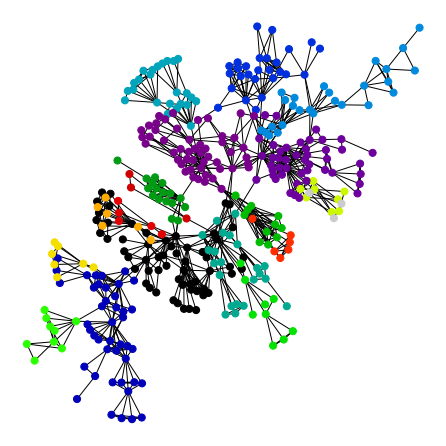

In [ ]:
plt.figure(figsize = [6,6])

nx.draw_kamada_kawai(G, node_color = colors, node_size = 50,
                     cmap = 'nipy_spectral')

Para esta gráfica se utilizó un cmap que genera altos contrastes, en este caso no es tan conveniente usar los que generan un gradiente uniforme (a la percepción) pues buscamos que las comunidades se distingan. Ver de nuevo los mapeos de color [disponibles](https://matplotlib.org/stable/tutorials/colors/colormaps.html).

En este caso, como se explica en la parte teórica, se han detectado grupos de nodos que maximizan la modularidad; estos grupos son tales que la modularidad de la red es elevada. El significado de estas comunidades es labor del análisis de las propiedades de los elementos y puede ser una ruta de investigación del fenómeno en cuestión. En este caso (coautorías), si las comunidades corresponden a grupos de trabajo de universidades, publicaciones de áreas de conocimiento específicas, comunidades culturales o lingüísticas de los autores o regiones geográficas (por poner ejemplos) se revelará en un análisis de las propiedades de los autores que son representados por nodos.

En cada res particular, las comunidades pueden motivar estas reflexiones dependiendo del fenómeno del que se trate.

En la siguiente celda se prueba que tal partición de los nodos efectivamente arroja una modularidad alta; recordar que una modularidad mayor a 0.3 ya puede considerarse significativa, y que el 1 es una cota superior. La documentación de la función ```modularity``` también está [disponible](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.quality.modularity.html#networkx.algorithms.community.quality.modularity).

In [ ]:
nx.algorithms.community.modularity(G, comunidades)

0.8373765256237758

## Propiedades globales

### Componentes
Como se menciona en el video correspondiente a propiedades globales, es común que las redes estén formadas por varias componentes no conectadas entre sí. Esto es especialmente común en redes biológicas como la que se usa en este ejemplo (de tortugas). Muchas veces, como veremos con las redes aleatorias, el análisis del número y tamaño de las componentes es importante para la comprensión de los fenómenos. 

En otras ocasiones, algunas de las propiedades de las redes que hemos estudiado hasta ahora no están definidas para redes disconexas (por ejemplo, la centralidad de cercanía), y la solución puede ser analizar sólo la componente más grande.

A continuación se hace esto para el conjunto de datos 'reptilia-tortoise-network-fi' disponible en networkrepository.


In [ ]:
files.upload()

Saving reptilia-tortoise-network-fi.edges to reptilia-tortoise-network-fi.edges


{'reptilia-tortoise-network-fi.edges': b'1 2 2005\n3 4 2005\n5 6 2005\n7 8 2005\n9 10 2005\n11 12 2005\n13 14 2005\n15 16 2005\n17 18 2005\n19 20 2005\n21 22 2005\n21 23 2005\n23 22 2005\n24 25 2005\n24 26 2005\n27 28 2005\n29 30 2005\n29 2 2005\n29 1 2005\n31 32 2005\n33 34 2005\n35 36 2005\n37 10 2005\n37 9 2005\n38 39 2005\n40 41 2005\n1 2 2005\n42 43 2005\n42 44 2005\n45 46 2005\n3 4 2005\n47 48 2005\n49 50 2005\n51 41 2005\n51 52 2005\n53 39 2005\n54 55 2005\n56 30 2005\n46 57 2005\n58 59 2005\n60 61 2005\n62 63 2005\n64 65 2005\n66 65 2005\n66 67 2005\n68 69 2005\n68 59 2005\n70 71 2005\n72 73 2005\n74 19 2005\n75 76 2005\n9 10 2005\n77 78 2005\n77 79 2005\n80 81 2005\n80 82 2005\n80 83 2005\n84 85 2005\n84 86 2005\n87 88 2005\n63 89 2005\n63 90 2005\n11 12 2005\n13 19 2005\n13 14 2005\n91 92 2005\n93 94 2005\n17 18 2005\n95 23 2005\n96 97 2005\n96 98 2005\n99 100 2005\n99 30 2005\n99 101 2005\n102 30 2005\n102 103 2005\n8 104 2005\n101 30 2005\n105 106 2005\n107 108 2005\n109 11

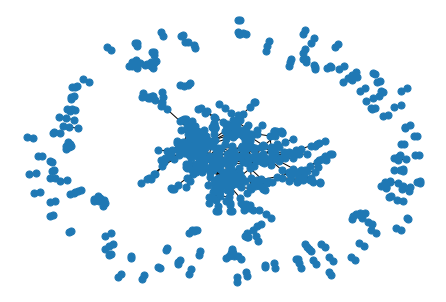

In [ ]:
ruta = 'reptilia-tortoise-network-fi.edges'

datos = pd.read_csv(ruta, 
            #nrows = 10,
            header = None,
            sep = ' ')

G = nx.from_pandas_edgelist(datos, source = 0, target = 1)
nx.draw(G, node_size = 50)

La función ```nx.connected_components(G)``` devuelve las componentes de la red en un objeto de tipo generador de python. Para su tratamiento basta con convertirlo en una lista.

Con tal lista de componentes y utilizando la función ```.subgraph()``` de la clase ```nx.Graph()``` se puede analizar por separado cada componente. En este caso se hace un bucle sobre todas las componentes y se grafica cada una:

El total de componentes de la red es: 104
Componente  0


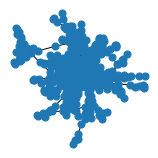

Componente  1


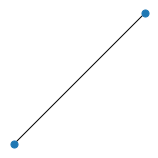

Componente  2


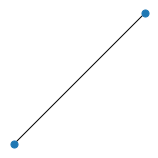

Componente  3


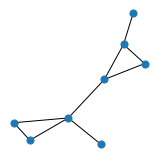

Componente  4


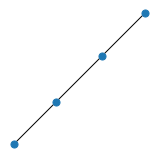

Componente  5


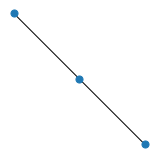

Componente  6


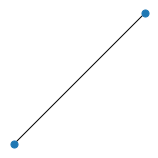

Componente  7


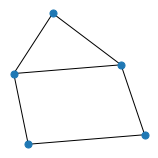

Componente  8


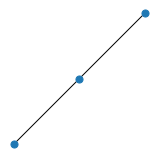

Componente  9


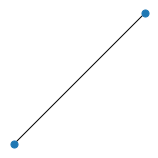

Componente  10


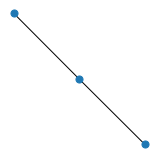

Componente  11


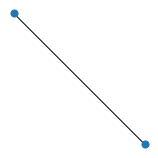

Componente  12


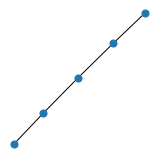

Componente  13


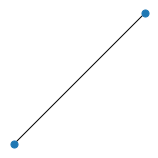

Componente  14


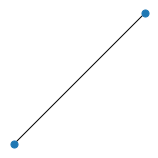

Componente  15


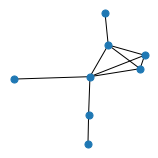

Componente  16


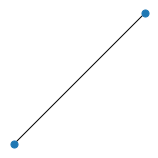

Componente  17


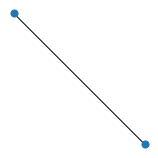

Componente  18


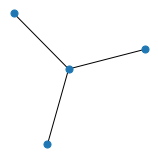

Componente  19


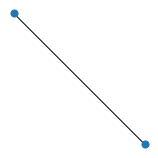

Componente  20


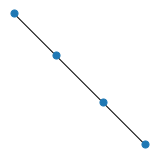

Componente  21


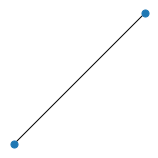

Componente  22


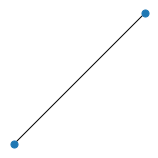

Componente  23


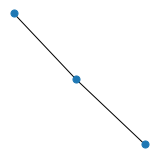

Componente  24


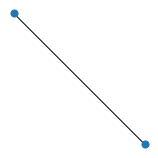

Componente  25


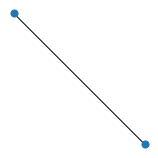

Componente  26


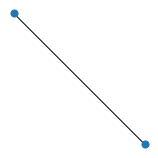

Componente  27


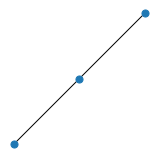

Componente  28


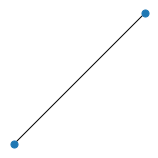

Componente  29


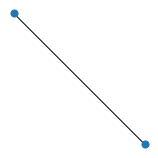

Componente  30


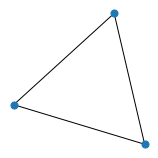

Componente  31


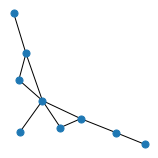

Componente  32


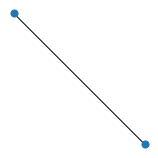

Componente  33


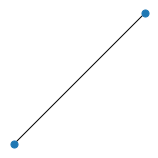

Componente  34


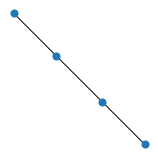

Componente  35


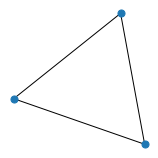

Componente  36


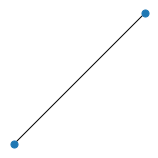

Componente  37


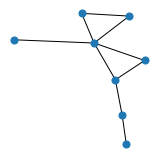

Componente  38


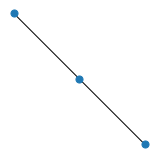

Componente  39


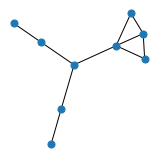

Componente  40


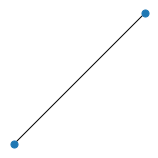

Componente  41


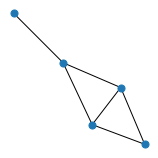

Componente  42


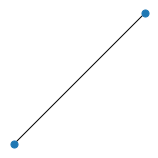

Componente  43


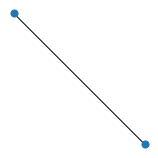

Componente  44


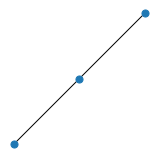

Componente  45


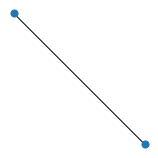

Componente  46


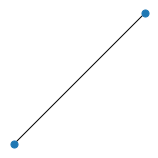

Componente  47


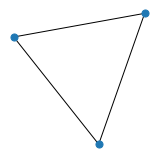

Componente  48


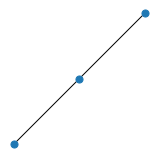

Componente  49


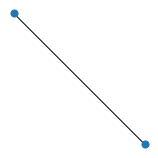

Componente  50


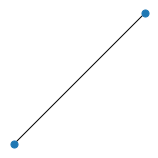

Componente  51


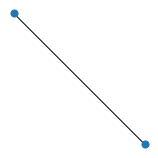

Componente  52


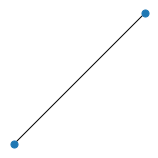

Componente  53


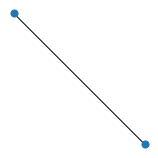

Componente  54


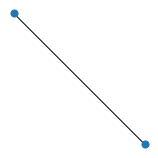

Componente  55


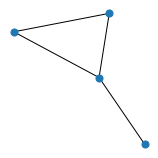

Componente  56


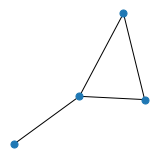

Componente  57


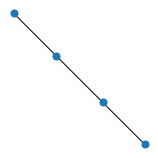

Componente  58


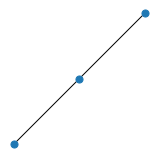

Componente  59


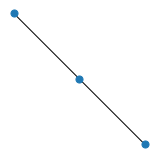

Componente  60


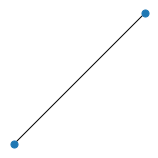

Componente  61


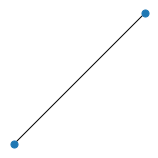

Componente  62


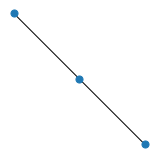

Componente  63


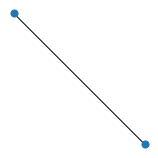

Componente  64


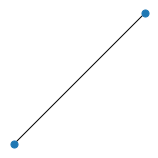

Componente  65


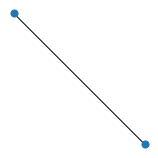

Componente  66


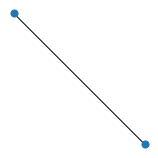

Componente  67


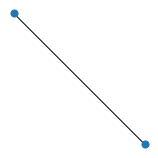

Componente  68


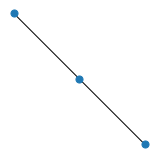

Componente  69


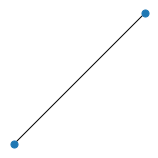

Componente  70


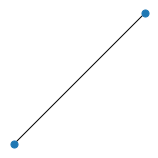

Componente  71


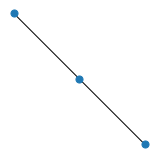

Componente  72


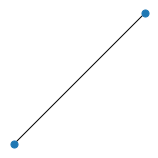

Componente  73


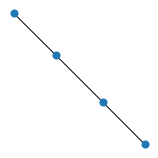

Componente  74


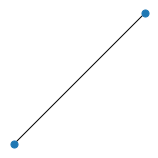

Componente  75


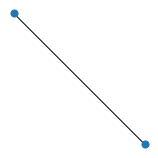

Componente  76


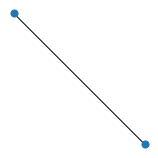

Componente  77


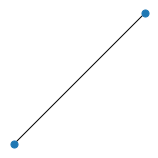

Componente  78


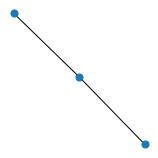

Componente  79


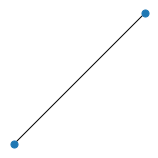

Componente  80


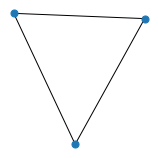

Componente  81


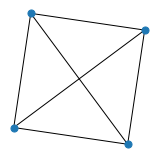

Componente  82


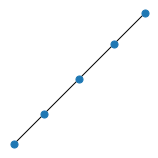

Componente  83


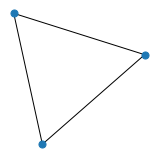

Componente  84


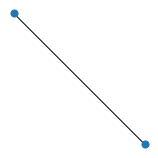

Componente  85


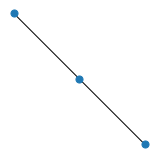

Componente  86


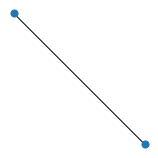

Componente  87


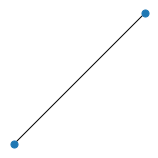

Componente  88


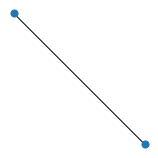

Componente  89


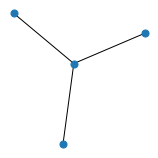

Componente  90


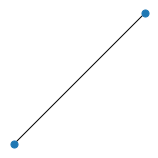

Componente  91


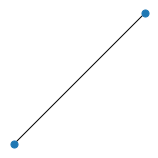

Componente  92


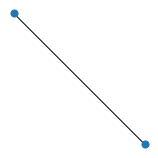

Componente  93


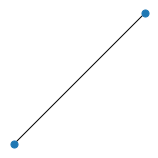

Componente  94


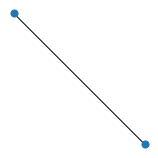

Componente  95


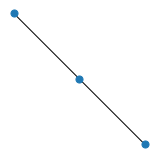

Componente  96


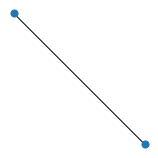

Componente  97


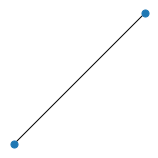

Componente  98


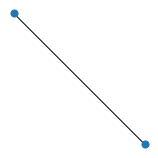

Componente  99


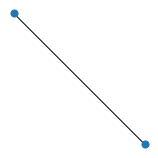

Componente  100


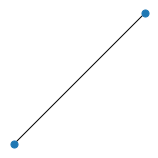

Componente  101


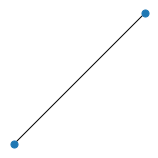

Componente  102


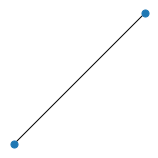

Componente  103


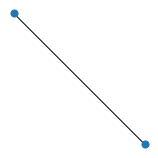

In [ ]:
componentes = list(nx.connected_components(G))
print("El total de componentes de la red es:", len(componentes))
for i, componente in enumerate(componentes):
  print('Componente ', i)
  plt.figure(figsize=[2,2])
  Gs = G.subgraph(componente)
  nx.draw(Gs, node_size = 50)
  plt.show()


Para concentrase en la máxima componente se puede aprovechar que la función ```max()``` de python admite un argument ```key``` que permite definir la función con la que se medirán los objetos de la lista. En este caso, al introducir la función ```len```, que devuelve la longitud de una lista, nos regresará el elemento más largo de la lista de componentes, esto es, la máxima componente:

La máxima componente contiene 496 de los 787 nodos


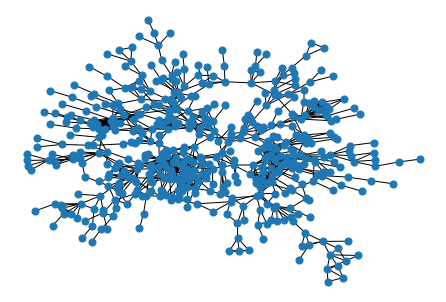

In [ ]:
max_comp = max(componentes, key = len ) #nodos de la máxima componente


print("La máxima componente contiene %i de los %i nodos" %(len(max_comp), len(G)))
Gm = G.subgraph(max_comp)

nx.draw_kamada_kawai(Gm, node_size = 50)

### Medidas promedio y otras medidas globales

Como veremos en la segunda parte del curso, los promedios de las propiedades de los nodos dan mucha información relevante de la red. Algunos vienen implementados en networkx y otros requieren que los calculemos. A continuación algunos ejemplos tanto de medidas promedio como de otras propiedades globales mencionadas en la parte teórica:

In [ ]:
N = nx.number_of_nodes(G)

print("El grado promedio de la red es %.3f" %(2*nx.number_of_edges(G)/N))

print("El clustering promedio de la red es %.3f" %nx.average_clustering(G))

print("La distancia promedio en la máxima componente es %.3f" %nx.average_shortest_path_length(Gm))

print("El diámetro de la máxima componente es %.3f" %max(nx.eccentricity(Gm).values()))

print("El radio de la máxima componente es %.3f" %min(nx.eccentricity(Gm).values()))

El grado promedio de la red es 3.042
El clustering promedio de la red es 0.268
La distancia promedio en la máxima componente es 7.933
El diámetro de la máxima componente es 21.000
El radio de la máxima componente es 11.000


Aprovechemos este cálculo para verificar la que distancia promedio de una red disconexa no está bien definida y marca error:

In [ ]:
nx.average_shortest_path_length(G)

NetworkXError: ignored

### Distribución de probabilidad de grado

Finalmente, a partir de la función ```.degree()``` de la clase ```nx.Graph()``` que devuelve una estructura similar a un diccionario, podemos utilizar el método usual (listas por comprensión) para generar un histograma de los grados de los nodos de la red; contar el número de nodos que tienen cierto grado:

In [ ]:
G.degree()

DegreeView({1: 9, 2: 4, 3: 4, 4: 7, 5: 1, 6: 1, 7: 1, 8: 3, 9: 4, 10: 6, 11: 4, 12: 4, 13: 3, 14: 1, 15: 1, 16: 2, 17: 1, 18: 1, 19: 3, 20: 1, 21: 3, 22: 2, 23: 3, 24: 2, 25: 2, 26: 1, 27: 2, 28: 1, 29: 5, 30: 5, 31: 1, 32: 5, 33: 1, 34: 1, 35: 1, 36: 2, 37: 6, 38: 2, 39: 5, 40: 2, 41: 2, 42: 2, 43: 1, 44: 1, 45: 4, 46: 2, 47: 2, 48: 1, 49: 1, 50: 1, 51: 3, 52: 3, 53: 2, 54: 2, 55: 1, 56: 1, 57: 1, 58: 7, 59: 6, 60: 1, 61: 1, 62: 1, 63: 8, 64: 1, 65: 2, 66: 2, 67: 2, 68: 6, 69: 3, 70: 1, 71: 5, 72: 1, 73: 1, 74: 3, 75: 1, 76: 1, 77: 3, 78: 1, 79: 4, 80: 3, 81: 4, 82: 1, 83: 1, 84: 5, 85: 4, 86: 1, 87: 1, 88: 1, 89: 4, 90: 2, 91: 1, 92: 1, 93: 5, 94: 1, 95: 4, 96: 3, 97: 1, 98: 1, 99: 3, 100: 1, 101: 4, 102: 2, 103: 2, 104: 3, 105: 11, 106: 2, 107: 2, 108: 3, 109: 1, 110: 2, 111: 1, 112: 1, 113: 1, 114: 1, 115: 5, 116: 4, 117: 1, 118: 2, 119: 1, 120: 1, 121: 2, 122: 1, 123: 5, 124: 3, 125: 3, 126: 12, 127: 4, 128: 2, 129: 2, 130: 1, 131: 1, 132: 1, 133: 1, 134: 1, 135: 1, 136: 1, 137: 1

In [ ]:
diccionario = dict(G.degree)
grados = [ diccionario[i] for i in G]


distribucion = {}

for i in grados: #este bucle únicamente genera las claves del diccionario, asignándoles un valor de 0
  distribucion[i] = 0

for i in grados: #este bucle recorre todos los grados y cada vez que un valor aparece, suma uno a la cuenta de ese valor
  distribucion[i] += 1

distribucion

{1: 309,
 2: 156,
 3: 101,
 4: 63,
 5: 41,
 6: 26,
 7: 20,
 8: 21,
 9: 14,
 10: 12,
 11: 8,
 12: 8,
 13: 3,
 14: 1,
 16: 2,
 17: 2}

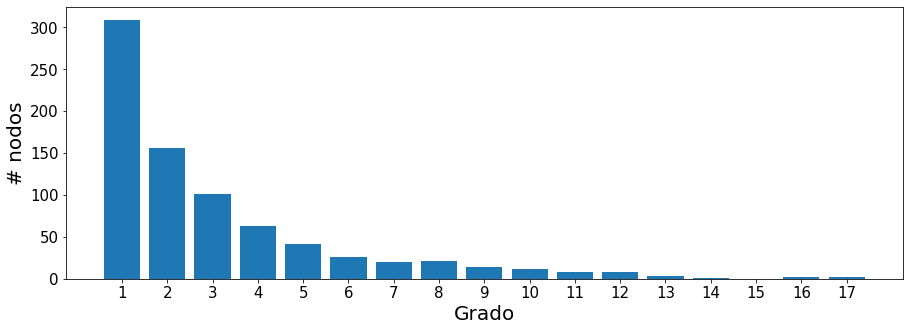

In [ ]:
X = distribucion.keys()
Y = distribucion.values()

plt.figure(figsize = [15, 5])

plt.bar(X,Y)

plt.xlabel('Grado', size = 20)
plt.ylabel('# nodos', size = 20)
plt.xticks(ticks = range(1,max(X)+1),labels = range(1,max(X)+1), size = 15)
plt.yticks(size = 15)
plt.show()

De este histograma se puede extraer información de la red. Por ejemplo que la mayoría de los nodos tienen grado 1 y predominan nodos con pocos enlaces, mientras que hay unas pocos nodos que tienen 16 y 17 enlaces.
Tomando en cuenta que se trata de tortugas, podemos sacar conclusiones respecto al comportamiento social de este animal.